# Machine Learning Project

Objective: Develop a classification model to predict a student's performance given certain socioeconomic conditions.

## Load packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import warnings

## Exploratory Analysis

The ICFES Saber 11 is an exam administered to students nearing graduation, primarily those in their final year of high school in Colombia. The test aims to assess students' level of knowledge and development across various subject areas. For the year 2022, these areas include:

* Mathematics
* Critical Reading
* Social and Civic Studies
* Natural Sciences
* English

The datasets spanning from 2000 to 2023 can be accessed from the following website:

[ICFES Data Portal](https://www.icfes.gov.co/data-icfes)

**Objectives of the Test Application**

1. Evaluate students' performance.
2. Provide relevant data to higher education institutions.
3. Monitor the quality of education in secondary institutions.

### Load and clean data

#### Load data

In [2]:
dataset = pd.read_csv('SB11_20221.csv')

#### Rename columns

In [3]:
df = dataset.rename(columns={'Unnamed: 0': 'Code',
                          'ESTU_GENERO': 'Sex',
                          'ESTU_FECHANACIMIENTO': 'Birthdate',
                          'ESTU_TIENEETNIA': 'Ethnics',
                          'ESTU_DEPTO_RESIDE': 'Department',
                          'FAMI_ESTRATOVIVIENDA': 'Stratum',
                          'FAMI_EDUCACIONPADRE': 'FatherEducation',
                          'FAMI_EDUCACIONMADRE': 'MotherEduaction',
                          'FAMI_TIENinAccuracyTERNET': 'HasInternet',
                          'FAMI_TIENECOMPUTADOR': 'HasComputer',
                          'COLE_NATURALEZA': 'SchoolType',
                          'COLE_AREA_UBICACION': 'SchoolPlace',
                          'COLE_JORNADA': 'SchoolShift',
                          'PUNT_GLOBAL': 'Score',
                          'ESTU_GENERACION-E': 'ScholarshipType'},
                         inplace=False)

#### Clean data

In [19]:
#Drop the useless columns
df = df. drop(columns=['Code', 'Birthdate', 'FatherEducation', 'HasComputer', 'ScholarshipType', 'Department'])
#Drop NaN data
df = df.dropna(axis='index', how='any')
#Verifying if there is NaN data
#df.isna().sum()
df.head()

Sex Ethnics    Stratum                     MotherEduaction  \
0   M      No  Estrato 3                             No sabe   
1   M      Si  Estrato 2  Secundaria (Bachillerato) completa   
2   F      Si  Estrato 1  Secundaria (Bachillerato) completa   
3   M      Si  Estrato 2      Técnica o tecnológica completa   
4   M      No  Estrato 2                 Primaria incompleta   

  FAMI_TIENEINTERNET SchoolType SchoolPlace SchoolShift Score  
0                 Si    OFICIAL      URBANO      MAÑANA     1  
1                 Si    OFICIAL      URBANO      MAÑANA     2  
2                 Si    OFICIAL      URBANO      MAÑANA     1  
3                 Si    OFICIAL      URBANO      MAÑANA     1  
4                 Si    OFICIAL      URBANO      MAÑANA     1

### Target Variable - Overall Score

<Axes: xlabel='Score'>

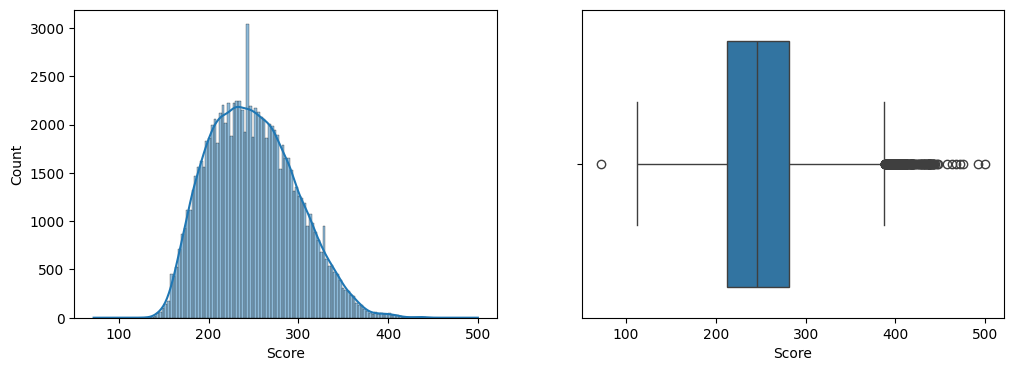

In [5]:
fig, axes = plt.subplots(1,2, figsize = (12,4))

sb.histplot(data=df, x = 'Score', kde=True, ax = axes[0])
sb.boxplot(data=df, x = 'Score', ax = axes[1])

## Categorize labels

Score is a feature which values are between 0 - 500. Thus, we rank the PUNT_GLOBAL in 4 categories:
* 0 - 150 : 0 (bad)
* 151 - 270: 1 (regular)
* 271 - 359: 2 (Good)
* 360 - 500: 3 (Excellent)

In [43]:
bins = [0, 150, 270, 359, 501]
labels = [0, 1, 2, 3]

df['Score'] = pd.cut(df['Score'], bins=bins, labels=labels, right=False)
#df = df.drop(columns=['Score'])
#Verifying that there is not nan values:
#df.isna().sum()


### How we face this socio-economic-educational problem?

* Linear Regression
* Single layer Perceptron
* Multi-Layer Perceptron Classifier

## The actual Machine Learning stuff

## Brief description of the model

### Default Parameters
We'll train different architectures of Artificial Neural Networks (ANN) and test their performance. 
To find the optimal performance of each ANN, we will do a grid search on the following hyperparameters:
* Regularization (alpha)
* Momentum (momentum)

## Separate training and testing data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('Score', axis = 'columns'), #features (X)
                                        df['Score'], #labels (Y)
                                        train_size   = 0.8,  #80% of data will be used for training
                                        random_state = 1234, #random seed
                                        shuffle      = True  #data is shuffled
                                    )

## Encode categorical features

We will use One hot encoding for the categorical features

In [8]:
# Codification (One hot encoding) of categorical variables
# ==============================================================================
# Identify the names of the numerical and categorical columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list() #Actually none of them

# One-hot encoding is applied only to the categorical columns
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'), cat_cols)],
                    remainder='passthrough',
                    verbose_feature_names_out=False
               ).set_output(transform="pandas")

# The transformation must be "fitted" before binAccuracyg applied; this is, it needs to know some parameters, 
# like the meand and std of numerical features for standarization. In this case, we are not going to standardize data because all our
# features are categorical, but it is a good practice to fit the transformer separately for training and test data.
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.fit_transform(X_test)

In [9]:
#What we just did?
display(X_train_prep)
# print("------------------------------")
# print("TRAINING SET")
# print("------------------------------")
# display(y_train.describe())
# display(X_train_prep.describe())
# display(X_train.describe(include = 'object'))
# print(" ")
# print(" ")
# print(" ")
# print("------------------------------")
# print("TESTING SET")
# print("------------------------------")
# display(y_test.describe())
# display(X_test_prep.describe())
# display(X_test.describe(include = 'object'))
# print(len(X_train_prep.columns))

Sex_M  Ethnics_Si  Stratum_Estrato 1  Stratum_Estrato 2  \
15562    0.0         0.0                0.0                1.0   
12156    1.0         0.0                0.0                0.0   
2898     0.0         0.0                1.0                0.0   
72200    1.0         0.0                0.0                0.0   
42791    0.0         0.0                0.0                1.0   
...      ...         ...                ...                ...   
93531    0.0         0.0                0.0                0.0   
63354    0.0         0.0                1.0                0.0   
35582    0.0         0.0                0.0                1.0   
60667    1.0         0.0                0.0                0.0   
97226    1.0         0.0                0.0                1.0   

       Stratum_Estrato 3  Stratum_Estrato 4  Stratum_Estrato 5  \
15562                0.0                0.0                0.0   
12156                1.0                0.0                0.0   
2898                 0.0                0.0                0.0   
72200                1.0                0.0                0.0   
42791                0.0                0.0                0.0   
...                  ...                ...                ...   
93531                1.0                0.0                0.0   
63354                0.0                0.0                0.0   
35582                0.0                0.0                0.0   
60667                1.0                0.0                0.0   
97226                0.0                0.0                0.0   

       Stratum_Estrato 6  Stratum_Sin Estrato  \
15562                0.0                  0.0   
12156                0.0                  0.0   
2898                 0.0                  0.0   
72200                0.0                  0.0   
42791                0.0                  0.0   
...                  ...                  ...   
93531                0.0                  0.0   
63354                0.0                  0.0   
35582                0.0                  0.0   
60667                0.0                  0.0   
97226                0.0                  0.0   

       MotherEduaction_Educación profesional completa  ...  \
15562                                             0.0  ...   
12156                                             0.0  ...   
2898                                              0.0  ...   
72200                                             0.0  ...   
42791                                             0.0  ...   
...                                               ...  ...   
93531                                             0.0  ...   
63354                                             0.0  ...   
35582                                             0.0  ...   
60667                                             0.0  ...   
97226                                             0.0  ...   

       MotherEduaction_Técnica o tecnológica incompleta  \
15562                                               0.0   
12156                                               0.0   
2898                                                1.0   
72200                                               0.0   
42791                                               0.0   
...                                                 ...   
93531                                               0.0   
63354                                               0.0   
35582                                               0.0   
60667                                               0.0   
97226                                               0.0   

       FAMI_TIENEINTERNET_Si  SchoolType_OFICIAL  SchoolPlace_URBANO  \
15562                    1.0                 1.0                 1.0   
12156                    1.0                 1.0                 1.0   
2898                     1.0                 1.0                 1.0   
72200                    1.0                 0.0                 0.0   
42791             

## Multi-layer Perceptron classifier

### Training algorithm

In [10]:
# Grid of evaluated hyperparameters
# ==============================================================================
param_grid = ParameterGrid(
                {'alpha':[1,2],#[0.0000001, 0.0001, 0.1, 1, 10, 50, 100],
                'momentum':[0,0.1]#[0, 0.2]#, 0.4, 0.6, 0.8, 1]               
                }
            )

#Loop to fit a model with each combination of hyperparameters."
# ==============================================================================
all_results = {'inAccuracy': [], 'params': [], 'outAccuracy': []}

for params in param_grid:
    
    # Setup the model
    model = MLPClassifier(solver='sgd', shuffle=True,  #Stochastic gradien descent, randomize the batches
                hidden_layer_sizes=(100,),  #architecture of the neural network
                activation='logistic', # activation function for the nodes
                batch_size=200, #do batches of size 200 (will do N//200 batches per epoch)
                learning_rate='constant', learning_rate_init=0.1, 
                tol=0.001, # Stop the algorithm after convergint to a lower error than this
                max_iter=200, # Max number of epochs to run if tolerance is not reached
                n_iter_no_change=10, #If the error does not improve (by at least tol) after 10 epochs, stop the algorithm'
                verbose = False,
                **params) #strength of L2 regularization (alhpa) and momentum
    
    # Fit the model
    model.fit(X_train_prep, y_train)
    
    # Store parameters and in-sample error
    all_results['params'].append(params)
    all_results['inAccuracy'].append(model.score(X_train_prep,y_train))

    # Evaluate the out-sample error
    all_results['outAccuracy'].append(model.score(X_test_prep,y_test))
    #===========================================================================
    # Print results
    print(f"Model: {params} \u2713")


Model: {'alpha': 1, 'momentum': 0} ✓
Model: {'alpha': 1, 'momentum': 0.1} ✓
Model: {'alpha': 2, 'momentum': 0} ✓
Model: {'alpha': 2, 'momentum': 0.1} ✓


### Store and visualize results

In [11]:
#Convert results to a pandas dataframe, sort them by decreasing outAccuracy and store them to a file
# ==============================================================================
all_results = pd.DataFrame(all_results)
all_results = pd.concat([all_results, all_results['params'].apply(pd.Series)], axis=1)
all_results = all_results.sort_values('outAccuracy', ascending=False)
all_results = all_results.drop(columns='params')
all_results.head(7)
# Store our results to a csv
# results.loc[results['outAccuracy']==max(results['outAccuracy'])] #Identify which combination of params gives the best result
#results.to_csv('results.csv')

inAccuracy  outAccuracy  alpha  momentum
1    0.707682     0.701548    1.0       0.1
3    0.705831     0.699322    2.0       0.1
2    0.699410     0.692021    2.0       0.0
0    0.686620     0.681872    1.0       0.0

## Working with saved results

In [42]:
saved_results = pd.read_csv('results.csv')
# Take one value and check if the model predicts its output correctly
#Prediction of our NN
test_index = 9
Y_predicted = model.predict(X_test_prep)
print(f"The model predicts: {Y_predicted[test_index]}. The actual value is: {y_test.iloc[test_index]}")

all_results = all_results.sort_values(by='alpha')
display(all_results)

The model predicts: 1. The actual value is: 1


inAccuracy  outAccuracy  alpha  momentum
1    0.707682     0.701548    1.0       0.1
0    0.686620     0.681872    1.0       0.0
3    0.705831     0.699322    2.0       0.1
2    0.699410     0.692021    2.0       0.0

In [13]:
saved_results.loc[saved_results['momentum']==0.0]#['alpha']

Unnamed: 0       Ein      Eout         alpha  momentum
1            6  0.709365  0.703360  1.000000e-04       0.0
2            0  0.708329  0.703050  1.000000e-07       0.0
6           12  0.707552  0.702428  1.000000e-01       0.0
9           18  0.706633  0.702118  1.000000e+00       0.0
28          36  0.666580  0.659763  1.000000e+02       0.0
34          30  0.666580  0.659763  5.000000e+01       0.0
40          24  0.666580  0.659763  1.000000e+01       0.0

### Visualizations

C:\Users\saath\AppData\Local\Temp\ipykernel_5144\2257729473.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--o" (-> color='r'). The keyword argument will take precedence.
  plt.plot(results_nomomentum['alpha'], results_nomomentum['Eout'], 'r--o', color='green', label='Test')


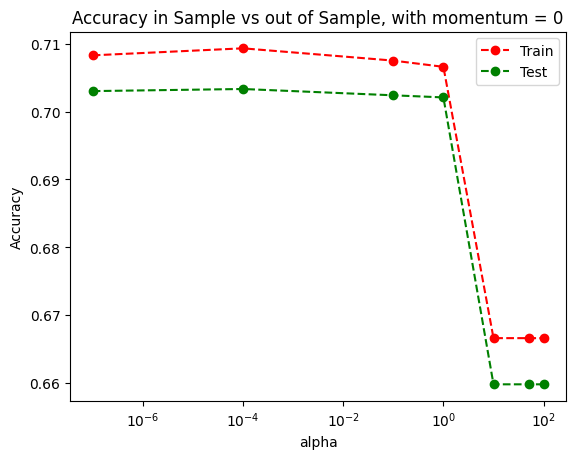

In [40]:
results_nomomentum = saved_results.loc[saved_results['momentum']==0.0].sort_values(by='alpha')
plt.plot(results_nomomentum['alpha'], results_nomomentum['Ein'], 'r--o', label='Train')
plt.plot(results_nomomentum['alpha'], results_nomomentum['Eout'], 'r--o', color='green', label='Test')
plt.title('Accuracy in Sample vs out of Sample, with momentum = 0')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(loc='best')

C:\Users\saath\AppData\Local\Temp\ipykernel_5144\520882378.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--o" (-> color='r'). The keyword argument will take precedence.
  plt.plot(results_alphafixed['momentum'], results_alphafixed['Eout'], 'r--o', color='green', label='Test')


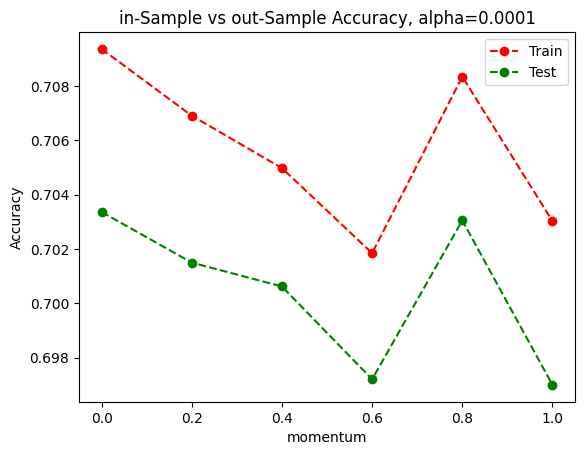

In [41]:
best_alpha=results_nomomentum.iloc[1]['alpha']
results_alphafixed = saved_results.loc[saved_results['alpha']==best_alpha].sort_values(by='momentum')
plt.plot(results_alphafixed['momentum'], results_alphafixed['Ein'], 'r--o', label='Train')
plt.plot(results_alphafixed['momentum'], results_alphafixed['Eout'], 'r--o', color='green', label='Test')
plt.title(f'in-Sample vs out-Sample Accuracy, alpha={best_alpha}')
plt.xlabel('momentum')
plt.ylabel('Accuracy')
#plt.xscale('log')
plt.legend(loc='best')

<bound method Axes3D.set of <Axes3D: xlabel='alpha', ylabel='momentum', zlabel='score'>>

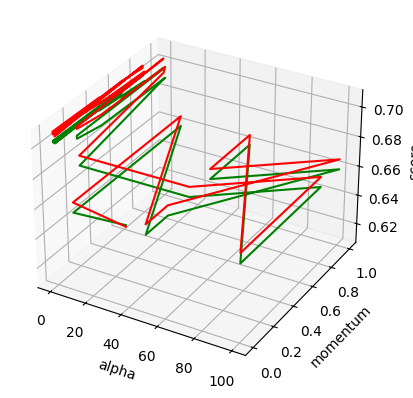

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(saved_results['alpha'], saved_results['momentum'], saved_results['Eout'], 'green')
ax.plot3D(saved_results['alpha'], saved_results['momentum'], saved_results['Ein'], 'red')
ax.set_xlabel('alpha')
ax.set_ylabel('momentum')
ax.set_zlabel('Z zzzz zzz (z)', rotation=-90)
ax.set_zlabel('score')
#ax.set_xticks(np.logspace(0, 2, num=4))  # Adjust the range as needed
#ax.set_xticklabels(['$10^{' + str(int(np.log10(tick))) + '}$' for tick in ax.get_xticks()])
ax.set
#plt.show(bbox_inches='tight')


In [20]:
all_results.loc[all_results['outAccuracy'].idxmax()]

inAccuracy     0.707682
outAccuracy    0.701548
alpha          1.000000
momentum       0.100000
Name: 1, dtype: float64

## Exploring different architectures

In [ ]:
# Grid of evaluated hyperparameters
# ==============================================================================
param_grid = ParameterGrid(
                {'alpha':[0.1],
                'momentum':[0.4]               
                }
            )

#Loop to fit a model with each combination of hyperparameters."
# ==============================================================================
results = {'inAccuracy': [], 'params': [], 'outAccuracy': []}

for params in param_grid:
    
    # Setup the model
    model = MLPClassifier(solver='sgd', shuffle=True,  #Stochastic gradien descent, randomize the batches
    hidden_layer_sizes=(100,100),  #architecture of the neural network
    activation='logistic', # activation function for the nodes
    batch_size=200, #do batches of size 200 (will do N//200 batches per epoch)
    learning_rate='constant', learning_rate_init=0.1, 
    tol=0.001, # Stop the algorithm after convergint to a lower error than this
    max_iter=200, # Max number of epochs to run if tolerance is not reached
    n_iter_no_change=10, #If the error does not improve (by at least tol) after 10 epochs, stop the algorithm'
    verbose = False,
    **params) #strength of L2 regularization (alhpa) and momentum
    
    # Fit the model
    model.fit(X_train_prep, y_train)
    
    # Store parameters and in-sample error
    results['params'].append(params)
    results['inAccuracy'].append(model.score(X_train_prep,y_train))

    # Evaluate the out-sample error
    results['outAccuracy'].append(model.score(X_test_prep,y_test))
    #===========================================================================
    # Print results
    print(f"Model: {params} \u2713")

Model: {'alpha': 0.1, 'momentum': 0.4} ✓


In [ ]:
#Convert results to a pandas dataframe, sort them by decreasing outAccuracy and store them to a file
# ==============================================================================
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('outAccuracy', ascending=False)
results = results.drop(columns='params')
results.head(7)
# Store our results to a csv
# results.loc[results['outAccuracy']==max(results['outAccuracy'])] #Identify which combination of params gives the best result
#results.to_csv('HiddenLayer_100x100_results.csv')

## Complexity vs. score graph

In [37]:
complexity_df = pd.read_csv('perceptron_results.csv')
complexity_df.loc[0,'Unnamed: 0']=str('perceptron')

onelayer_20units = pd.read_csv('HiddenLayer_20_results.csv')
onelayer_50units = pd.read_csv('HiddenLayer_50_results.csv')
onelayer_200units = pd.read_csv('HiddenLayer_200_results.csv')
onelayer_500units = pd.read_csv('HiddenLayer_500_results.csv')
onelayer_900units = pd.read_csv('HiddenLayer_900_results.csv')
for complexity, i in enumerate([5,20,50,200,500,900,'100x100']):
    add_to_complexity = pd.read_csv(f'HiddenLayer_{i}_results.csv')
    add_to_complexity.loc[0,'Unnamed: 0']=str(i)#complexity+2
    complexity_df = pd.concat([complexity_df, add_to_complexity])
#complexity_df.concat([complexity_df, onelayer_20units,onelayer_20units,onelayer_20units,onelayer_20units,onelayer_20units])
# supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

complexity_df.rename(columns={'Unnamed: 0':'Complexity'}, inplace=True)
complexity_df.rename(columns={'Ein': 'inAccuracy', 
                                              'Eout': 'outAccuracy'}, 
                                              inplace=True)
print(complexity_df)

   Complexity  inAccuracy  outAccuracy  alpha  momentum
0  perceptron    0.691405     0.687329    0.0       0.2
0           5    0.709546     0.704189    0.1       0.4
0          20    0.706452     0.702687    0.1       0.4
0          50    0.691306     0.685911    0.1       0.4
0         200    0.703203     0.698338    0.1       0.4
0         500    0.508026     0.515818    0.1       0.4
0         900    0.686697     0.681251    0.1       0.4
0     100x100    0.707824     0.702325    0.1       0.4


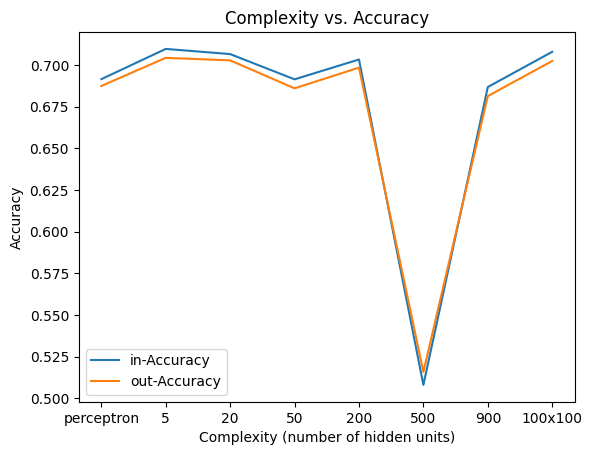

In [39]:
plt.plot(complexity_df['Complexity'], complexity_df['inAccuracy'],label='in-Accuracy')
plt.plot(complexity_df['Complexity'], complexity_df['outAccuracy'],label='out-Accuracy')
plt.xlabel('Complexity (number of hidden units)')
plt.title('Complexity vs. Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()